# L'accessibilité et la mobilité dans l'espace et le temps

## Présentation de l'accessibilité
### Définition
> Définition: "***Plus ou moins grande facilité pour accéder à un lieu en vue d’y effectuer une activité***", *source: [article L. Chapelon](http://www.hypergeo.eu/spip.php?article30)*)*

> Savez-vous comment se déroulent vos déplacements et sauriez-vous mesurer l'accessibilité d'un lieu familier ? 

### Comment calculer ? 
#### Vol d'oiseau (*source gif: https://giphy.com/gifs/eagle-flies-dubai-13KUgH5O5rdNvi/links*)
![bird](https://media.giphy.com/media/13KUgH5O5rdNvi/giphy.gif)

#### Isochrone: "***du grec isos, égal, et khronos, temps***" (*source: [Larousse](https://www.larousse.fr/dictionnaires/francais/isochrone/44424?q=isochrone#44358)*)

<img src="https://github.com/sical/app_iso/blob/iso_design/code/experiments/images/isochrone_construction.png?raw=true" width="90%">

### Les graphes
<img src="https://github.com/sical/app_iso/blob/iso_design/code/experiments/images/multidigraph.png?raw=true" width="90%">

## La cartographie interactive et dynamique
### Les projections

La Terre étant ronde, il faut user de calculs mathématiques pour la représenter sur un plan. Voici pourquoi le choix des projections est important (*notamment pour le calcul des distances*) au travers de ces exemples:

* On dézoome sur [Google Maps](https://www.google.com/maps) pour avoir une représentation plus juste de la taille des pays et des continents
* On peut continuer le *jeu* avec ce [site web](https://thetruesize.com/#?borders=1~!MTU0NDMwMDE.NTEyMDk2OA*MzE3Njc5Mzk(NTcyNDE5MA)
* On finit sur une [animation de transitions entre différentes projections](https://bl.ocks.org/mbostock/3711652)

### Outils en ligne

* Style:
    * Exemple de réalisation cartographique: [F4 maps](https://demo.f4map.com)
* Cartographie collaborative:
    * OpenStreetMap:
        * [carte interactive](https://www.openstreetmap.org/#map=15/49.1063/6.2167)
        * [exemple d'outil de requête](https://overpass-turbo.eu)
    * [uMap](https://umap.openstreetmap.fr/fr/)
* Cartographie 3D:
    * Exemple: [CesiumJS](https://cesiumjs.org), notamment l'exemple de [New-York](https://cesiumjs.org/NewYork/)

### Quelques outils gratuits et libres

* [QGIS](https://www.qgis.org/fr/site/)
* [Python](https://www.python.org)
* [Bokeh](https://bokeh.pydata.org/en/latest/)

## Démonstration
### Parcours à vol d'oiseau & Isochrone

> On part du principe que la **vitesse moyenne** en transports en commun est de **20km/h**. Dans notre cas de figure, on décide d'un **temps** de parcours maximum de **20 minutes**. 


| nom   | temps | distance |
|:-----:|:-----:|:--------:|
| base  | 60    | 20       |
| buffer| 20    | ?        |

In [3]:
#Distance pour la zone tampon (buffer)
base_temps = 60
base_distance = 20*1000 #on met la distance en mètres
buffer_temps = 20
distance_buffer = buffer_temps * base_distance // base_temps

print ("Nous avons donc une distance tampon de " + str(distance_buffer) + " mètres")

Nous avons donc une distance tampon de 6666 mètres


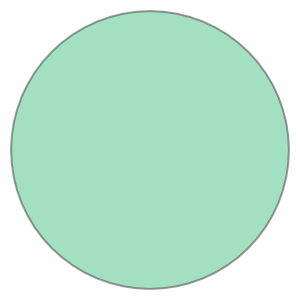

In [4]:
#Création de la zone tampon (polygone) à partir d'une origine
from shapely.geometry import Point
from pyproj import Proj, transform

lat = 2.34472
lng = 48.85103
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3857')
lat,lng = transform(inProj,outProj,lat,lng)

buffer = Point(lat,lng).buffer(distance_buffer)


data_buffer = {
    "x": [coord[0] for coord in list(buffer.exterior.coords)],
    "y": [coord[1] for coord in list(buffer.exterior.coords)]
}

buffer

In [5]:
from shapely.geometry import Polygon

coordinates = [(260918.44558597656, 6245731.851133796), (260794.97556744865, 6245618.888104871), (260769.9027429826, 6245637.483378832), (260662.59134702143, 6245408.94269276), (260694.72906335586, 6245376.804976426), (260611.39573002252, 6245293.471643093), (260528.06239668917, 6245376.804976426), (260611.39573002252, 6245460.138309759), (260649.29399542292, 6245422.240044359), (260703.49176898395, 6245686.737113977), (260525.27496226545, 6245818.911706034), (260537.44171558347, 6246313.312838833), (260148.10092459279, 6246341.277314456), (260062.27689141483, 6246236.700427449), (260048.32380600198, 6246234.155223538), (260086.33991658667, 6246145.781535853), (259747.51500070395, 6245835.713585866), (259650.50084634117, 6246046.771652138), (259150.23659828358, 6245963.541981085), (259259.80673746183, 6246195.19391522), (259211.51072234954, 6246305.92654861), (258993.220257069, 6246401.309789049), (258997.3260506338, 6247084.753776777), (258840.27565549265, 6247148.183594665), (259156.6660792721, 6247290.24873965), (258943.68593419844, 6247539.690847151), (258978.72229670882, 6247616.530765684), (258807.8925273847, 6247875.782691973), (258649.54789212724, 6247601.304576835), (258656.91389016944, 6247803.500693216), (258396.74257117105, 6247693.140891403), (258295.29877562812, 6248008.828851379), (258025.45988197048, 6247923.6468767), (257848.5267345008, 6248103.257087054), (257602.6685130087, 6247944.30171603), (257391.7099852496, 6248174.295323708), (257145.41267142497, 6248074.409257696), (257079.42666138077, 6248290.017356235), (256725.90459584122, 6248219.650699741), (256596.0520313124, 6248125.261102894), (256660.9211926523, 6248206.7161045475), (256628.30044599826, 6248200.223121229), (256351.68394951354, 6248366.020668697), (256330.84652567207, 6248170.347986365), (256249.99245341503, 6248507.263459381), (256174.8966323295, 6248644.059940549), (255688.51539771454, 6248488.0228660675), (255559.9582674967, 6248567.393995592), (255409.26562390715, 6248517.004158701), (255399.43545296002, 6248528.982256657), (255383.77303619563, 6248501.3885589475), (255209.18477581683, 6248553.095219811), (255300.70899591953, 6248649.280792629), (255180.43005119488, 6248795.84111083), (255014.84780548842, 6248683.284162911), (255116.52118055237, 6248873.714295024), (255115.5572699831, 6248874.8888234515), (255182.89806378476, 6249135.208912439), (254981.64788615296, 6249303.810469326), (255207.74198820107, 6249231.2483597), (255213.64223425972, 6249254.05700944), (255040.12372901716, 6249361.6029215185), (255044.34474114297, 6249767.642371464), (255702.88454479468, 6250007.314344854), (255781.89691409445, 6249788.172718641), (256242.58308804783, 6249947.018874235), (256208.12932402463, 6249652.157165837), (256381.3655176915, 6249489.378244345), (256606.707151004, 6249575.970115718), (256757.31128329184, 6249730.0818446), (257075.87309417143, 6249715.828189138), (257191.23335015675, 6249890.74889048), (257307.71994659142, 6249758.464396397), (257505.27753827482, 6250120.640899603), (257707.71545619718, 6250144.023642521), (257705.08339207992, 6249859.257916716), (257948.2920159539, 6250092.0332299955), (257988.44793892882, 6250331.794394075), (257871.97637472904, 6250439.479808179), (258218.8551265851, 6250350.98956072), (258245.86220225628, 6250376.8380705295), (258317.72080458875, 6250519.352268449), (258081.42638142486, 6250692.330109297), (258367.47302793176, 6250606.429009134), (258402.76387179046, 6250660.329901124), (258331.70910459955, 6250809.741682144), (258266.66490120415, 6250842.629536215), (258124.2426605798, 6250734.662343952), (258193.08577275602, 6251077.569835969), (258207.81780732272, 6251070.256495023), (258141.0817176478, 6251210.58709367), (257789.22968372444, 6251245.944171931), (257757.51091785473, 6251223.116057978), (257806.680336422, 6251102.219743557), (257564.53645753677, 6251082.608455056), (257469.3047746871, 6250890.774423954), (257260.3965863887, 6251279.171348989), (256824.4773986486, 6251511.056217323), (256857.43214743942, 6251679.491943285), (257099.39398114695, 6251696.076260402), (257093.00162075314, 6251728.212826258), (257148.84061413116, 6251803.502993114), (257157.13505179156, 6251960.5595905315), (257269.80768648165, 6251966.60820885), (257347.69589254176, 6252071.628297424), (257511.29966144438, 6252063.590959648), (257549.5099303734, 6252313.864736717), (257609.59495767957, 6252058.762021396), (257861.17937746455, 6252046.402471401), (257895.10218288764, 6251971.403199643), (257908.15838205538, 6251968.308948117), (257897.07797765167, 6251967.034953367), (258025.5170674015, 6251683.071464016), (258121.53710196796, 6251675.034471285), (258352.77165103552, 6251982.477137065), (259008.8083046803, 6252030.468571335), (259144.2158676811, 6252193.074791194), (259089.07682217204, 6252007.728041538), (259291.9306868298, 6252030.696877389), (259320.49920169738, 6251981.295237551), (259381.63611026955, 6252078.238557127), (259446.64899614255, 6251857.209164515), (259388.12339084066, 6251864.35720798), (259559.159970216, 6251568.5949839875), (259600.65669178852, 6251788.512337663), (259731.67519195224, 6251758.811183836), (259873.48426324842, 6252010.834344384), (260034.40785933012, 6251899.554819835), (260167.43562845272, 6252063.023101756), (260202.0355479316, 6251877.550662622), (260599.03746186505, 6252639.0557926865), (260805.57189243598, 6252631.527981291), (260778.58153229745, 6252833.015755488), (261303.30972142227, 6252694.6578536425), (261333.7879033079, 6252984.321464676), (261540.77284070407, 6252946.9066744), (261669.9155399629, 6253131.554706638), (261786.46076106039, 6253098.431270654), (261870.35626774922, 6253304.3152702935), (261833.2628894798, 6253443.753770942), (261916.85490532694, 6253418.42538012), (261954.9815818617, 6253511.990255853), (262303.0353216781, 6253619.701372796), (262341.82920320245, 6253660.021788581), (261512.299649959, 6254053.339503279), (261690.50092760645, 6254182.937742449), (261391.91016725072, 6254430.6493182825), (261547.36737123062, 6254745.72054319), (261673.17754127673, 6254727.7877341695), (261687.24646561925, 6254761.753122125), (261653.42095281946, 6254903.857411164), (261756.30560431952, 6254928.476631382), (261862.5114552969, 6255184.880237214), (262319.3286859396, 6255400.938696328), (262643.54958665493, 6255284.930603082), (262669.43507807906, 6255340.409590255), (262740.1740258264, 6255250.357825928), (262923.1716270767, 6255184.880237214), (263042.80814183556, 6254896.052140729), (263280.3192095085, 6254781.837493648), (263131.7259568526, 6254681.385545777), (263142.8415411868, 6254654.550151324), (262984.99654537445, 6254284.748086093), (262984.8690952068, 6254283.774970053), (262984.7490110812, 6254284.168158346), (262878.3840550911, 6254034.97444656), (262890.4149521035, 6253839.000157432), (262492.7831986024, 6253625.991236968), (262769.1664404207, 6253150.477890163), (262662.73240833817, 6253096.908712584), (262636.1053533559, 6252995.981818994), (262769.55779203953, 6252872.607719071), (262610.3724830812, 6252898.444233192), (262577.2198541226, 6252772.78287645), (262568.0273276545, 6252711.294842375), (262746.4568106969, 6252591.579291794), (262529.6392400762, 6252203.235116308), (262733.08642003353, 6252186.753158184), (262468.9139984717, 6252068.202201853), (262758.0318488673, 6251983.775728488), (262548.42871757445, 6251920.894215314), (262439.3012228506, 6251470.787378725), (262684.916092802, 6251275.25587483), (262671.78081994137, 6251066.040813429), (262462.82111874927, 6251119.817765041), (262689.6727731543, 6250873.874894034), (262612.1587859119, 6250752.825435232), (262802.89259981184, 6250603.211284474), (262953.00068861846, 6250698.957195255), (262926.08161824214, 6250552.699720948), (262937.1847124839, 6250556.059648334), (263022.13513388246, 6250445.01517271), (263479.1339670654, 6250515.997931935), (263532.2005381008, 6250679.682472064), (263578.8163202623, 6250496.396465332), (264041.4299828153, 6250448.93068639), (264040.1322633983, 6250267.461485335), (264291.1000307371, 6250355.077420376), (264159.10551721766, 6250054.500578874), (264288.651838205, 6249878.019369102), (264375.8761340829, 6249941.899917217), (264412.7423513852, 6249708.3029075945), (264457.81809540093, 6249753.37865161), (264510.22178764694, 6249700.974959364), (264670.1960762489, 6249647.32333825), (264524.8106014295, 6249566.66669811), (264401.60655190947, 6249575.694428506), (264427.3863519069, 6249617.143728438), (264374.4847620676, 6249670.045318277), (264403.79376792425, 6249699.354324133), (264246.06825318513, 6249662.80482128), (264154.3805593049, 6249394.554572407), (264199.2697944039, 6249340.671859891), (264349.0085450194, 6249404.035919162), (264246.6348252379, 6249283.817330423), (264264.78625802684, 6249262.029290761), (264242.42206104065, 6249215.758714439), (264339.20933530753, 6249197.606387275), (264195.34944562736, 6248965.123039929), (264307.73601044045, 6248773.441873733), (264484.0684748267, 6248613.436664527), (264600.4226732549, 6248127.02853313), (264604.6217689637, 6248114.894232666), (264603.1231792803, 6248115.739313597), (264624.57666993287, 6248026.054949464), (264406.8197715098, 6247935.857088838), (264127.9173980839, 6248044.931314854), (264143.2589463252, 6247969.355672483), (264045.32281833084, 6248043.590954426), (263926.01691799774, 6247806.364299796), (264172.9269539207, 6247436.213184193), (263849.181124875, 6247329.955628257), (263733.7808992246, 6247591.82360357), (263542.17218107, 6247489.406609972), (263454.80685219285, 6247268.055685383), (262983.05011474295, 6247164.004408137), (262837.38147309114, 6247377.218472092), (262622.7408554233, 6247131.147769758), (262730.16967983416, 6247481.84600312), (262729.1058843228, 6247483.061754568), (262320.1416893065, 6247149.651417517), (262209.85756519996, 6247221.211653176), (262207.22156061133, 6247214.740044011), (262249.23459763767, 6247142.527840815), (262201.72407155455, 6246959.317896284), (262263.30917162384, 6246938.079252446), (262179.87099344906, 6246875.048123717), (262146.56000423065, 6246746.594389564), (262401.3015666237, 6246636.495970212), (262409.1454508473, 6246365.423281738), (262446.5852789183, 6246327.983453667), (262411.25126818113, 6246292.64944293), (262413.259094854, 6246223.262012075), (262225.7246023595, 6246107.122777108), (262196.5852789183, 6246077.983453667), (262189.7344738827, 6246084.834258703), (262095.5798162561, 6246026.524719162), (262048.14408832605, 6246193.77238573), (261844.1854186329, 6246165.159408976), (261992.43721595878, 6246282.131516626), (261946.58527891833, 6246327.983453667), (261969.48653810192, 6246350.884712851), (261862.38433147554, 6246408.040793179), (261985.5210688964, 6246619.831281994), (261958.01784779166, 6246608.439074803), (261935.78803242123, 6246619.641193214), (261720.85521159574, 6246505.314123361), (261529.13120253885, 6246791.806114489), (261482.3528447356, 6246727.119279312), (261360.07714388645, 6246393.938580016), (261482.19506365785, 6246013.327260983), (261181.1708049795, 6245951.629445724), (261137.57506419264, 6245799.571371652), (261094.62336480533, 6245893.036624517), (261087.2696733036, 6245886.30871376), (261130.80256548958, 6245661.691463817), (260918.44558597656, 6245731.851133796)]
xs = []
ys = []
time_ = {}

for i,coords in enumerate(coordinates):
    xs = xs + [coords[0]]
    ys = ys + [coords[1]]
    time_[i] = {
        "xs":xs,
        "ys":ys
    }

In [6]:
import os
import sys

add_path = os.getcwd().replace('experiments', '')
sys.path.append(add_path)

import geopandas as gpd
import geojson
from bokeh.plotting import figure, show
from bokeh.palettes import Viridis256, Magma11, RdYlBu11, Greens9, Inferno256, Viridis6
from bokeh.io import output_notebook, push_notebook
from bokeh.tile_providers import STAMEN_TERRAIN_RETINA
from bokeh.models import GeoJSONDataSource, ColumnDataSource, CategoricalColorMapper, LinearColorMapper
from bokeh.palettes import Colorblind8 as cb
from bokeh.transform import factor_cmap
from ipywidgets import interact
import json
from pyproj import Proj, transform

output_notebook()

#Prepare the Bokeh figure
p = figure(
    title="Isochrone Example"
)

p.width = 800
p.add_tile(STAMEN_TERRAIN_RETINA, alpha=0.2)

#Set origin
lat = 2.34472
lng = 48.85103
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3857')
lat,lng = transform(inProj,outProj,lat,lng)
data_ori = {
    "x":[lat],
    "y":[lng],
    "name":["Origin"]
}

ori = ColumnDataSource(data_ori)

#Buffer
buffer = ColumnDataSource(data_buffer)

poly_buffer = p.patch(
    x="x",
    y="y",
    fill_color=Viridis6[5],
    fill_alpha=0.5,
    line_color="blue",
    line_alpha=0.0,
    source=buffer,
    legend="Buffer"
)

#Points
data_pts = {
    "x":[],
    "y":[],
}

pts = ColumnDataSource(data_pts)

circ = p.circle(
    x="x",
    y="y",
    size=2,
    color=Viridis6[0],
    alpha=0.5,
    source=pts,
    legend="Points"
)

#Polygons
data_polys = {
    "xs":[],
    "ys":[],
}

polys = ColumnDataSource(data_polys)

polys = p.patch(
    x="xs",
    y="ys",
    fill_color=Viridis6[3],
    fill_alpha=0.5,
    line_color="blue",
    line_alpha=0.0,
    source=polys,
    legend="Polygones"
)

#Add ori
p.triangle(
    x="x",
    y="y",
    size=20,
    color="red",
    alpha=0.5,
    source=ori,
    legend="Origin"
)

p.legend.click_policy="hide"

def update_pts(t):
    circ.data_source.data["x"] = time_[t]["xs"]
    circ.data_source.data["y"] = time_[t]["ys"]
    push_notebook()
    
def update_polys(t):
    polys.data_source.data["xs"] = time_[t]["xs"]
    polys.data_source.data["ys"] = time_[t]["ys"]
    push_notebook()

show(p, notebook_handle=True)

Loading BokehJS ...

In [7]:
interact(update_pts, t=(276,i))

interactive(children=(IntSlider(value=276, description='t', max=276, min=276), Output()), _dom_classes=('widget-interact',))

<function __main__.update_pts>

In [8]:
interact(update_polys, t=(276,i))

interactive(children=(IntSlider(value=276, description='t', max=276, min=276), Output()), _dom_classes=('widget-interact',))

<function __main__.update_polys>